638.355769231


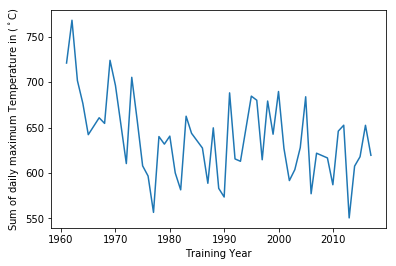

The 600 rule shoud not be used


In [1]:

##Problem 1-1
def isleapyear(year):
    if ((((year%4)==0) and ((year%100) != 0)) or ((year%400) ==0)):
        return True
    else:
        return False
         
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

tyear=[]
df=pd.read_csv("modified tokyo.csv")
j=31
summaxtemp=[] #array containing the summation of daily max temmp until bloom date of the training years


for i in range(1961,2018):
    
    #Skipping the test years
    if i in [1966,1971,1985,1994,2008]:
        if isleapyear(i):
            j=j+366
        else:
            j=j+365
        continue
        
        
    #locating the bloom date of a particular training year
    bdi=df.loc[(df['year'] == i) & df['bloom'].isin([1])].index.tolist()
    tsum=0
    k=j
    
    #Summing the daily max temperature until bloom date of a training year
    while k<=bdi[0]:
        tsum=tsum+df.iloc[k,10]
        k=k+1
        tsum
    summaxtemp.append(tsum)

    if isleapyear(i):
        j=j+366
    else:
        j=j+365
    tyear.append(i)
    
    

meansummaxtemp=np.mean(summaxtemp)
print(meansummaxtemp)
plt.plot(tyear,summaxtemp) 
plt.ylabel("Sum of daily maximum Temperature in ($^\circ$C)")
plt.xlabel("Training Year")
plt.show()


if meansummaxtemp==600:
    print("The 600 rule should be used")
else:
    print("The 600 rule shoud not be used")

In [12]:
#problem 1-2
pbd=[]
abd=[]
for i in [1966,1971,1985,1994,2008]:
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    j=31
    tsum=0
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    abd.append(bdi[0]+1)
    while tsum<=meansummaxtemp:
        tsum=tsum+df2.iloc[j,10]
        j=j+1
    pbd.append(j)
    
print('The actual bloom dates extracted from the data are',abd)
print('The predicted Bloom Dates values using Tmean',pbd)

#calculating R^2 value
rscoremean=metrics.r2_score(abd,pbd)
print('The R\u00b2 value using Tmean is:',rscoremean)

#Using the 600 rule
pbd=[]
abd=[]
for i in [1966,1971,1985,1994,2008]:
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    j=31
    tsum=0
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    abd.append(bdi[0]+1)
    while tsum<=600:
        tsum=tsum+df2.iloc[j,10]
        j=j+1
    pbd.append(j)
print('The predicted Bloom Dates values using 600\N{DEGREE SIGN}C ',pbd)


#calculating R^2 value
rscore600=metrics.r2_score(abd,pbd)
print('The R\u00b2 value using 600\N{DEGREE SIGN}C rule is:',rscore600)

The actual bloom dates extracted from the data are [79, 89, 93, 90, 82]
The predicted Bloom Dates values using Tmean [82, 88, 91, 90, 85]
The R² value using Tmean is: 0.832361516035
The predicted Bloom Dates values using 600°C  [79, 86, 88, 87, 83]
The R² value using 600°C rule is: 0.679300291545
